# Milestone 1
Building on previous exercises, build an interactive application that asks the user a series of questions and then stores the user's answers for later analysis.

## Requirements
Your submission should include the following:
- A Chatbot that asks three users a series of at least three questions.
- Your chatbot should store the user's responses in a data structure, preferably a Pandas DataFrame, so that it can present a graphical analysis of the responses.
- Your chatbot should provide at least one visualization, such as a vertical bar chart, that provides a basic summary and analysis of the user input.

## Example Code

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

### Create a Basic Chatbot

In [76]:
## Simple interactive chatbot
# user = input("What is your name? ")
# print("Type 'end' or 'quit' to quit.")
# while True:
#     msg = input("Hi how can I help you? ")
#     if ("end" in msg) | ("quit" in msg):
#         break
#     print("you said {} words and {} letters".format(len(msg.split(" ")), len(msg)),
#         end="\n")

### Initialize a DataFrame to Store User Input

In [77]:
import os.path

path = './user_data.csv'

data_store = pd.DataFrame()
check_file = os.path.isfile(path)
if check_file:
  data_store = pd.read_csv(path, index_col=0)

### Run the Chatbot and Save Each User's Answers

In [79]:
## Simple interactive chatbot
import requests

class Question:
    def __init__(self, question, validator, answer_processor):
        self.question = question
        self.validator = validator
        self.answer_processor = answer_processor
    
    def _update_user_response(self, user_response):
        self.user_response = user_response

    def _check_format(self, text):
        if 'Bye' in text:
            print("Bye!")
            return None
        if self.validator == str:
            return True 
        elif self.validator == int:
            try:
                text = int(text)
                return True
            except:
                return False
        elif type(self.validator) == list and text in self.validator:
            return True
        else:
            return False
    
    def ask_and_record(self):
        temp = input(self.question)
        check = self._check_format(temp)
        while check == False:
            temp = input("Answer Not Supported! " + self.question)
        if check == None:
            return None
        self._update_user_response(temp)
        self.bot_answer = self.answer_processor(temp)
        print(self.bot_answer)
        return True

def positive_vs_negative(text):
    positive_url = "https://ptrckprry.com/course/ssd/data/positive-words.txt"
    negative_url = "https://ptrckprry.com/course/ssd/data/negative-words.txt"

    payload={}
    headers = {}

    negative_response = requests.request("GET", negative_url, headers=headers, data=payload)
    positive_response = requests.request("GET", positive_url, headers=headers, data=payload)

    negative_list = negative_response.text.split('\n')[35:-1]
    positive_list = positive_response.text.split('\n')[35:-1]

    positive_count = 0
    negative_count = 0
    text = str(text)
    for word in text.split(' '):
        if word in negative_list:
            negative_count = negative_count + 1
        if word in positive_list:
            positive_count = positive_count + 1
    if positive_count > negative_count:
        return 1
    elif positive_count < negative_count:
        return -1
    else:
        return 0
    
def check_nums(text):
    nums = int(text)
    return 0 if nums == 0 else 1

q_and_a = [
    Question(
        "Are you a student?", 
        ['yes', 'no'], 
        lambda a: "Ok get it."
    ),
    Question(
        "How was your day?", 
        str, 
        lambda a: ["Oh yeah!", "Great to Hear!", "I'm Sorry to hear that!"][positive_vs_negative(a)]
    ),
    Question(
        "How many interviews have you received?", 
        int, 
        lambda a: ["You will get it!", "Congrats!"][check_nums(a)]
    )
]

user_info = Question("What is your name?", str, lambda a : "Happy to meet you! " + a)
if user_info.ask_and_record() != None:
    print(f'I will ask a few questions. Press "QT" to quit.')

    for qa in q_and_a:
        if qa.ask_and_record() == None:
            break
        new_response = {'user_name': user_info.user_response, 'question': qa.question, 'user_answer': qa.user_response, 'bot_answer': qa.bot_answer}
        new_data = pd.DataFrame(new_response, index=[0])
        data_store = pd.concat([data_store, new_data]) if data_store.empty == False else new_data

    print("Thanks for your response. I've made a note of it.")

What is your name? fanny


Happy to meet you! fanny
I will ask a few questions. Press "QT" to quit.


Are you a student? no


Ok get it.


How was your day? bad


I'm Sorry to hear that!


How many interviews have you received? 0


You will get it!
Thanks for your response. I've made a note of it.


### View Cumulative Data

In [80]:
data_store.to_csv(path)

### Analyze Data

[3, 6, 3]


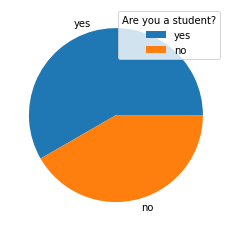

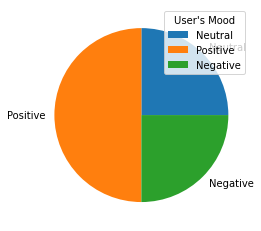

In [82]:
q1 = data_store[data_store['question'] == 'Are you a student?']
plt.figure(0)
plt.pie(q1['user_answer'].value_counts(), labels=list(q1['user_answer'].value_counts().keys()))
plt.legend(title = "Are you a student?")

q2 = data_store[data_store['question'] == 'How was your day?']
values = q2['user_answer'].values
counter = [0, 0, 0]
counter_label = ["Neutral", "Positive", "Negative"]
for value in values:
    index = positive_vs_negative(value)
    counter[index] = counter[index] + 1
plt.figure(1)
print(counter)
plt.pie(counter, labels=counter_label)
plt.legend(title = "User's Mood")

## Be Creative!
Don't limit yourself to a simple Q&A. Feel free to explore things like the sentiment analysis that we did in Lab 1 by determining whether a user's input is positive or negative (remember the positive and negative word lists).